# Naive-Bayes Classification

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

# Bayesian Classification

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$. Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

                                   P(L~|~features)=P(features~|~L)P(L)
                                                       P(features)

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Imagine that you have the following data:

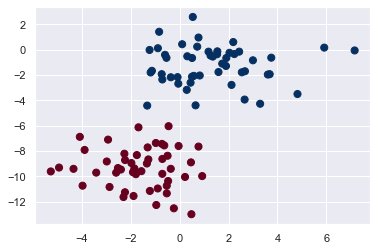

In [44]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

This procedure is implemented in Scikit-Learn's sklearn.naive_bayes.GaussianNB estimator:

In [45]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Now let's generate some new data and predict the label:

In [46]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000,2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

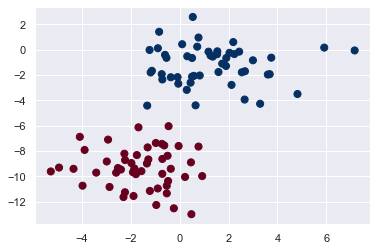

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the predict_proba method:

In [48]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# Multinomial Naive Bayes

# Example: Classifying Text

Let's download the data and take a look at the target names:

In [49]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [75]:
categories = ['alt.atheism','comp.graphics',
            'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
            'comp.sys.mac.hardware','comp.windows.x',
            'misc.forsale','rec.autos',
            'rec.motorcycles','rec.sport.baseball',
            'rec.sport.hockey','sci.crypt',
            'sci.electronics','sci.med',
            'sci.space','soc.religion.christian',
            'talk.politics.guns','talk.politics.mideast',
            'talk.politics.misc','talk.religion.misc']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [76]:
print(train.data[6])

From: bmdelane@quads.uchicago.edu (brian manning delaney)
Subject: Brain Tumor Treatment (thanks)
Reply-To: bmdelane@midway.uchicago.edu
Organization: University of Chicago
Lines: 12

There were a few people who responded to my request for info on
treatment for astrocytomas through email, whom I couldn't thank
directly because of mail-bouncing probs (Sean, Debra, and Sharon).  So
I thought I'd publicly thank everyone.

Thanks! 

(I'm sure glad I accidentally hit "rn" instead of "rm" when I was
trying to delete a file last September. "Hmmm... 'News?' What's
this?"....)

-Brian



In [77]:
#In order to use this data for machine learning, we need to be able to convert the content of each string into a vector 
#of numbers. For this we will use the TF-IDF vectorizer 
#(discussed in Feature Engineering), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [79]:
#With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [80]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data:

Text(21.453124999999993, 0.5, 'predicted label')

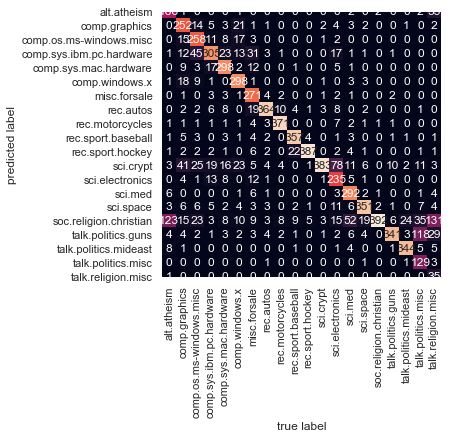

In [81]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
plt.figure(figsize=(5,20))
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True,
           fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [82]:
#Evidently, even this very simple classifier can successfully separate space talk from computer talk,
#but it gets confused between talk about religion and talk about Christianity.
#This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for any string, using the predict() method of this pipeline. Here's a quick utility function that will return the prediction for a single string:

In [83]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [84]:
#let's try it out

In [85]:
predict_category("sending a payload to the ISS")

'sci.space'

In [90]:
predict_category("talking about government")

'sci.crypt'

In [74]:
predict_category("talking about islam vs hinduisam")

'soc.religion.christian'

In [87]:
predict_category("that's a nice car")

'rec.autos'

In [89]:
predict_category("i like sports")

'rec.sport.baseball'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

They are extremely fast for both training and prediction
They provide straightforward probabilistic prediction
They are often very easily interpretable
They have very few (if any) tunable parameters